In [44]:
import os
import sys
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split

import sys
sys.path.append(os.path.abspath(os.path.join('..')))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from src.models.dl_models import MLPModel,LSTMModel,CNNModel
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Evaluación del conjunto de pruebas

In [2]:
project_root = os.path.dirname(os.getcwd())
models_path = os.path.join(project_root,'models')

results_path = models_path +'/results'

In [3]:
df_cv_temp = pd.read_csv(results_path+ '/resultados_cv_temporales.csv')
df_cv_spec = pd.read_csv(results_path+ '/resultados_cv_espectrales.csv')

In [4]:
df_cv_temp

,Modelo,F1-score,Balanced accuracy,Accuracy
0,RandomForest,0.957794,0.938660,0.958400
1,KNN,0.910487,0.833977,0.912793
2,SVM,0.868703,0.798637,0.877896
3,MLP,0.855619,0.771292,0.863981
4,LSTM,0.885283,0.832175,0.891374
5,CNN,0.901648,0.853901,0.900482


In [5]:
df_cv_spec

,Modelo,F1-score,Balanced accuracy,Accuracy
0,RandomForest,0.924124,0.884841,0.927509
1,KNN,0.836343,0.792084,0.842707
2,SVM,0.681787,0.610594,0.753898
3,MLP,0.845460,0.773531,0.858371
4,LSTM,0.545040,0.426538,0.600540
5,CNN,0.921160,0.903473,0.917894


In [6]:
df_test_temp = pd.read_csv(results_path+ '/resultados_test_temporales.csv')
df_test_spec = pd.read_csv(results_path+ '/resultados_test_espectrales.csv')

In [7]:
df_test_temp

,Modelo,F1-score,Balanced accuracy,Accuracy,Archivo
0,RandomForest,0.958805,0.934855,0.959790,randomforest_features_temporales.pkl
1,KNN,0.918273,0.848871,0.919872,knn_features_temporales.pkl
2,SVM,0.880890,0.817746,0.888695,svm_features_temporales.pkl
3,MLP,0.881447,0.805214,0.886946,mlp_features_temporales.pkl
4,LSTM,0.896086,0.845083,0.901515,lstm_features_temporales.pkl
5,CNN,0.885312,0.842927,0.874417,cnn_features_temporales.pkl


In [8]:
df_test_spec

,Modelo,F1-score,Balanced accuracy,Accuracy,Archivo
0,RandomForest,0.937376,0.904040,0.939977,randomforest_features_espectrales.pkl
1,KNN,0.845333,0.800851,0.851107,knn_features_espectrales.pkl
2,SVM,0.696941,0.625412,0.768065,svm_features_espectrales.pkl
3,MLP,0.878723,0.829787,0.883159,mlp_features_espectrales.pkl
4,LSTM,0.561533,0.466667,0.610140,lstm_features_espectrales.pkl
5,CNN,0.957456,0.939862,0.957751,cnn_features_espectrales.pkl


## Análisis de confusiones frecuentes entre clases y visualización de ejemplos clasificados correctamente e incorrectamente

- y_temp_test: etiquetas verdaderas
- y_temp_pred: predicciones del modelo
- X_temp_test: features del test

In [9]:
project_root = os.path.dirname(os.getcwd())
data_path = os.path.join(project_root, 'data')
processed_path = data_path + '/processed'

save_models_path = os.path.join(project_root, 'models', 'save_models')
save_results_path = os.path.join(project_root, 'models', 'results')

features_temporal = pd.read_csv(processed_path + '/features_temporales_labelNum_overlap50.csv')
features_espectrales = pd.read_csv(processed_path + '/features_espectrales_labelNum_overlap50.csv')

X_temp = features_temporal.iloc[:, 1:-1] 
y_temp = features_temporal.iloc[:, -1]  
X_spec = features_espectrales.iloc[:, 1:-1] 
y_spec = features_espectrales.iloc[:, -1]  

# Dividir el dataset en entrenamiento y prueba
X_temp_train, X_temp_test, y_temp_train, y_temp_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)
X_spec_train, X_spec_test, y_spec_train, y_spec_test = train_test_split(X_spec, y_spec, test_size=0.2, random_state=42)

In [10]:
def confusion_matrix_models(y_test, y_pred, title):
    cm = confusion_matrix(y_test,y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues', xticks_rotation=45)
    plt.title(title)
    plt.show

In [69]:
def ejemplos_clasificados(y_type_test, y_type_pred, type, model):
    print(f'Ejemplos clasificados de {model} - {type}',)
    correct_idx_type = np.where(y_type_test == y_type_pred)[0]
    incorrect_idx_type = np.where(y_type_test != y_type_pred)[0]
    
    print("\nClasificados correctamente:")
    display(pd.DataFrame({
        'Index': y_type_test.index[correct_idx_type],
        'True': y_type_test.values[correct_idx_type],
        'Pred': y_type_pred[correct_idx_type]
    }).head(5))

    print("\nClasificados incorrectamente:")
    display(pd.DataFrame({
        'Index': y_type_test.index[incorrect_idx_type],
        'True': y_type_test.values[incorrect_idx_type],
        'Pred': y_type_pred[incorrect_idx_type]
    }).head(5))


### Random forest

In [ ]:
rf_temp = joblib.load(save_models_path + '/randomforest_features_temporales.pkl')
rf_spec = joblib.load(save_models_path + '/randomforest_features_espectrales.pkl')

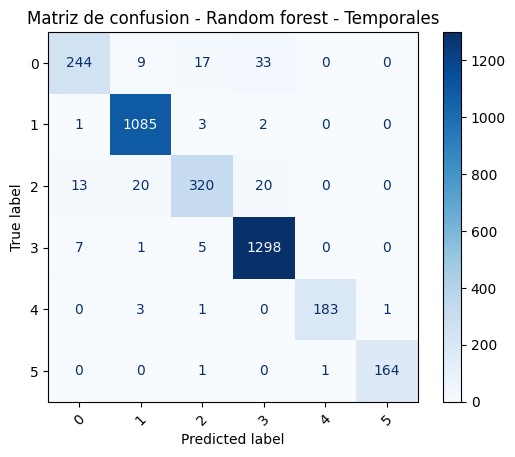

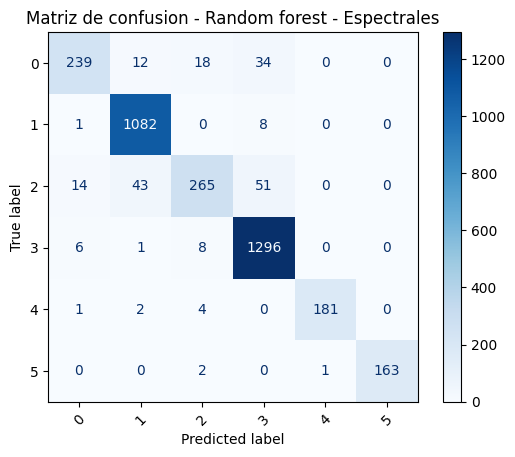

In [63]:
y_temp_pred = rf_temp.predict(X_temp_test)
y_spec_pred = rf_spec.predict(X_spec_test)

confusion_matrix_models(y_temp_test, y_temp_pred, "Matriz de confusion - Random forest - Temporales")
confusion_matrix_models(y_spec_test, y_spec_pred, "Matriz de confusion - Random forest - Espectrales")

In [70]:
ejemplos_clasificados(y_temp_test, y_temp_pred, "temporales", "Random forest")
ejemplos_clasificados(y_spec_test, y_spec_pred, "espectrales", "Random forest")

Ejemplos clasificados de Random forest - temporales

Clasificados correctamente:


,Index,True,Pred
0,13170,1,1
1,2751,2,2
2,744,3,3
3,12907,3,3
4,15729,3,3



Clasificados incorrectamente:


,Index,True,Pred
0,9180,4,5
1,4351,0,2
2,7346,1,2
3,3821,0,3
4,2270,2,3


Ejemplos clasificados de Random forest - espectrales

Clasificados correctamente:


,Index,True,Pred
0,13170,1,1
1,744,3,3
2,12907,3,3
3,15729,3,3
4,8620,3,3



Clasificados incorrectamente:


,Index,True,Pred
0,2751,2,3
1,9180,4,0
2,4351,0,3
3,7346,1,0
4,12495,2,1


### KNN

In [ ]:
knn_temp = joblib.load(save_models_path + '/knn_features_temporales.pkl')
knn_spec = joblib.load(save_models_path + '/knn_features_espectrales.pkl')

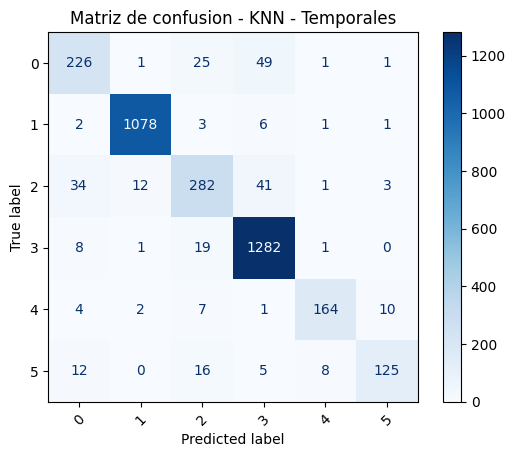

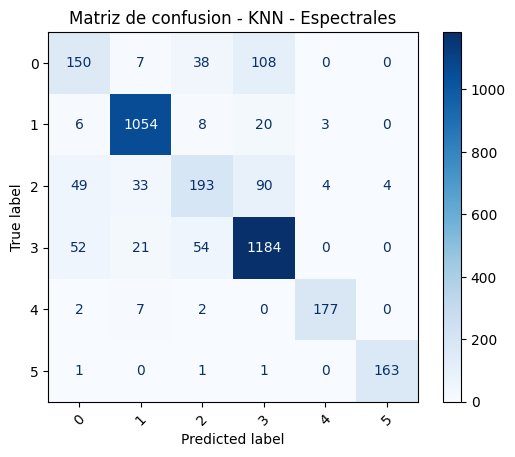

In [15]:
y_temp_pred = knn_temp.predict(X_temp_test)
y_spec_pred = knn_spec.predict(X_spec_test)

confusion_matrix_models(y_temp_test, y_temp_pred, "Matriz de confusion - KNN - Temporales")
confusion_matrix_models(y_spec_test, y_spec_pred, "Matriz de confusion - KNN - Espectrales")

In [71]:
ejemplos_clasificados(y_temp_test, y_temp_pred, "temporales", "KNN")
ejemplos_clasificados(y_spec_test, y_spec_pred, "espectrales", "KNN")

Ejemplos clasificados de KNN - temporales

Clasificados correctamente:


,Index,True,Pred
0,13170,1,1
1,2751,2,2
2,744,3,3
3,12907,3,3
4,15729,3,3



Clasificados incorrectamente:


,Index,True,Pred
0,9180,4,5
1,4351,0,2
2,7346,1,2
3,3821,0,3
4,2270,2,3


Ejemplos clasificados de KNN - espectrales

Clasificados correctamente:


,Index,True,Pred
0,13170,1,1
1,744,3,3
2,12907,3,3
3,15729,3,3
4,8620,3,3



Clasificados incorrectamente:


,Index,True,Pred
0,2751,2,3
1,9180,4,0
2,4351,0,3
3,7346,1,0
4,12495,2,1


### SVM

In [17]:
svm_temp = joblib.load(save_models_path + '/svm_features_temporales.pkl')
svm_spec = joblib.load(save_models_path + '/svm_features_espectrales.pkl')

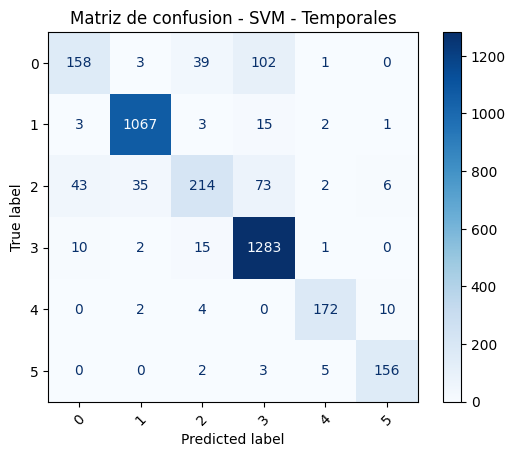

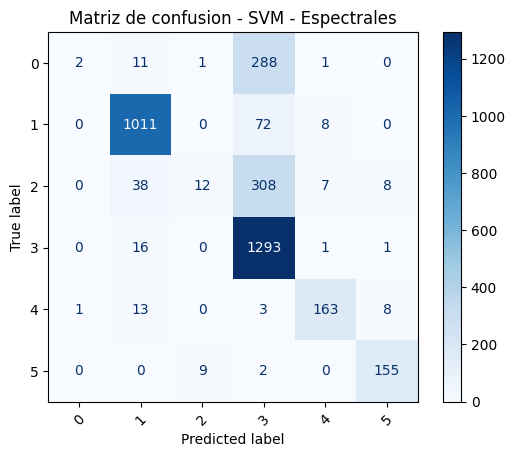

In [18]:
y_temp_pred = svm_temp.predict(X_temp_test)
y_spec_pred = svm_spec.predict(X_spec_test)

confusion_matrix_models(y_temp_test, y_temp_pred, "Matriz de confusion - SVM - Temporales")
confusion_matrix_models(y_spec_test, y_spec_pred, "Matriz de confusion - SVM - Espectrales")

In [72]:
ejemplos_clasificados(y_temp_test, y_temp_pred, "temporales", "SVM")
ejemplos_clasificados(y_spec_test, y_spec_pred, "espectrales", "SVM")

Ejemplos clasificados de SVM - temporales

Clasificados correctamente:


,Index,True,Pred
0,13170,1,1
1,2751,2,2
2,744,3,3
3,12907,3,3
4,15729,3,3



Clasificados incorrectamente:


,Index,True,Pred
0,9180,4,5
1,4351,0,2
2,7346,1,2
3,3821,0,3
4,2270,2,3


Ejemplos clasificados de SVM - espectrales

Clasificados correctamente:


,Index,True,Pred
0,13170,1,1
1,744,3,3
2,12907,3,3
3,15729,3,3
4,8620,3,3



Clasificados incorrectamente:


,Index,True,Pred
0,2751,2,3
1,9180,4,0
2,4351,0,3
3,7346,1,0
4,12495,2,1


### MLP

In [42]:
mlp_temp = MLPModel(input_size=X_temp_train.shape[1], num_classes=6).to(device)
mlp_spec = MLPModel(input_size=X_spec_train.shape[1], num_classes=6).to(device)

In [ ]:
mlp_temp.load_state_dict(torch.load(save_models_path+'/mlp_features_temporales.pth', map_location='cpu'))
mlp_temp.eval()

with torch.no_grad():
    X_tensor = torch.FloatTensor(X_temp_test.values)
    outputs = mlp_temp(X_tensor)
    y_temp_pred = outputs.argmax(dim=1).numpy()
    
    
mlp_spec.load_state_dict(torch.load(save_models_path+'/mlp_features_espectrales.pth', map_location='cpu'))
mlp_spec.eval()

with torch.no_grad():
    X_tensor = torch.FloatTensor(X_spec_test.values)
    outputs = mlp_spec(X_tensor)
    y_spec_pred = outputs.argmax(dim=1).numpy()

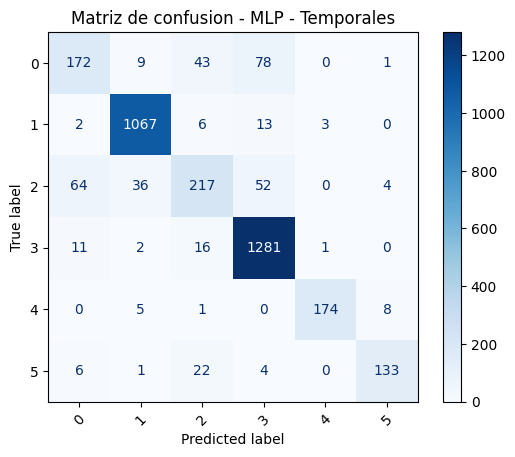

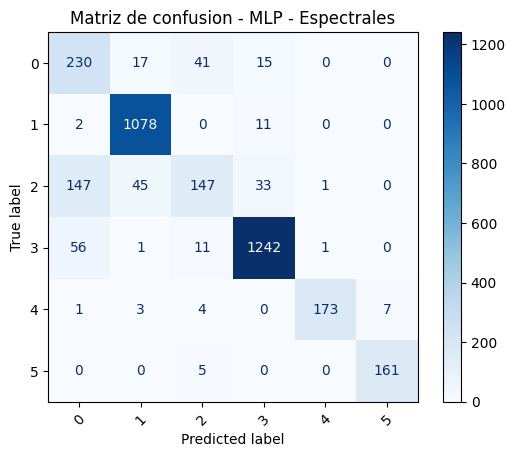

In [41]:
confusion_matrix_models(y_temp_test, y_temp_pred, "Matriz de confusion - MLP - Temporales")
confusion_matrix_models(y_spec_test, y_spec_pred, "Matriz de confusion - MLP - Espectrales")

In [73]:
ejemplos_clasificados(y_temp_test, y_temp_pred, "temporales", "MLP")
ejemplos_clasificados(y_spec_test, y_spec_pred, "espectrales", "MLP")

Ejemplos clasificados de MLP - temporales

Clasificados correctamente:


,Index,True,Pred
0,13170,1,1
1,2751,2,2
2,744,3,3
3,12907,3,3
4,15729,3,3



Clasificados incorrectamente:


,Index,True,Pred
0,9180,4,5
1,4351,0,2
2,7346,1,2
3,3821,0,3
4,2270,2,3


Ejemplos clasificados de MLP - espectrales

Clasificados correctamente:


,Index,True,Pred
0,13170,1,1
1,744,3,3
2,12907,3,3
3,15729,3,3
4,8620,3,3



Clasificados incorrectamente:


,Index,True,Pred
0,2751,2,3
1,9180,4,0
2,4351,0,3
3,7346,1,0
4,12495,2,1


### LSTM

In [45]:
lstm_temp = LSTMModel(input_size=X_temp_train.shape[1], num_classes=len(np.unique(y_temp_train))).to(device)
lstm_spec = LSTMModel(input_size=X_spec_train.shape[1], num_classes=len(np.unique(y_spec_train))).to(device)

In [ ]:
lstm_temp.load_state_dict(torch.load(save_models_path+'/lstm_features_temporales.pth', map_location='cpu'))
lstm_temp.eval()

with torch.no_grad():
    # Para temporales
    X_tensor = torch.FloatTensor(X_temp_test.values).unsqueeze(1)  # (batch, 1, features)
    outputs = lstm_temp(X_tensor)
    y_temp_pred = outputs.argmax(dim=1).numpy()
    
    
lstm_spec.load_state_dict(torch.load(save_models_path+'/lstm_features_espectrales.pth', map_location='cpu'))
lstm_spec.eval()

with torch.no_grad():
    # Para espectrales
    X_tensor = torch.FloatTensor(X_spec_test.values).unsqueeze(1)
    outputs = lstm_spec(X_tensor)
    y_spec_pred = outputs.argmax(dim=1).numpy()

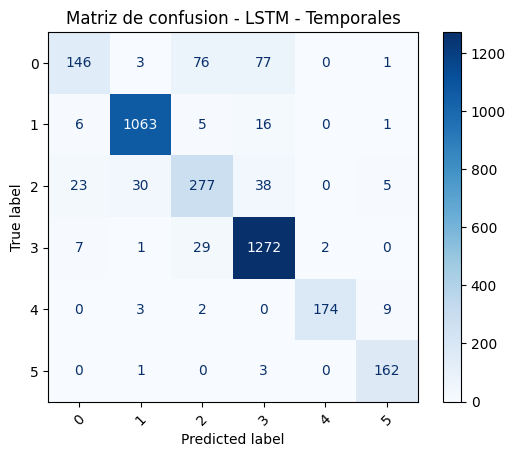

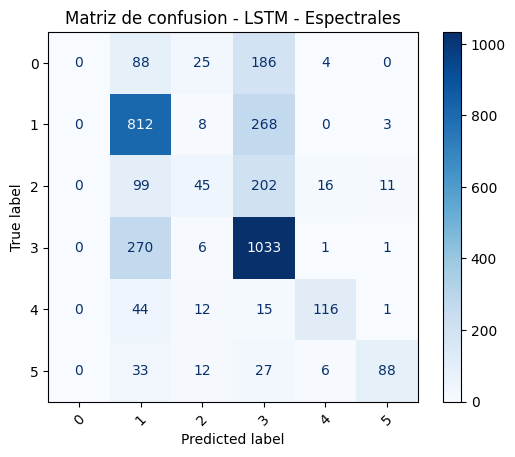

In [48]:
confusion_matrix_models(y_temp_test, y_temp_pred, "Matriz de confusion - LSTM - Temporales")
confusion_matrix_models(y_spec_test, y_spec_pred, "Matriz de confusion - LSTM - Espectrales")

In [74]:
ejemplos_clasificados(y_temp_test, y_temp_pred, "temporales", "LSTM")
ejemplos_clasificados(y_spec_test, y_spec_pred, "espectrales", "LSTM")

Ejemplos clasificados de LSTM - temporales

Clasificados correctamente:


,Index,True,Pred
0,13170,1,1
1,2751,2,2
2,744,3,3
3,12907,3,3
4,15729,3,3



Clasificados incorrectamente:


,Index,True,Pred
0,9180,4,5
1,4351,0,2
2,7346,1,2
3,3821,0,3
4,2270,2,3


Ejemplos clasificados de LSTM - espectrales

Clasificados correctamente:


,Index,True,Pred
0,13170,1,1
1,744,3,3
2,12907,3,3
3,15729,3,3
4,8620,3,3



Clasificados incorrectamente:


,Index,True,Pred
0,2751,2,3
1,9180,4,0
2,4351,0,3
3,7346,1,0
4,12495,2,1


### CNN

In [49]:
cnn_temp = CNNModel(input_channels=1, num_classes=len(np.unique(y_temp_train)), input_features=X_temp_train.shape[1]).to(device)
cnn_spec = CNNModel(input_channels=1, num_classes=len(np.unique(y_spec_train)), input_features=X_spec_train.shape[1]).to(device)

In [ ]:
cnn_temp.load_state_dict(torch.load(save_models_path + '/cnn_features_temporales.pth', map_location='cpu'))
cnn_temp.eval()

with torch.no_grad():
    # Temporales
    X_tensor_temp = torch.FloatTensor(X_temp_test.values).unsqueeze(1)  # (batch, 1, features)
    outputs_temp = cnn_temp(X_tensor_temp)
    y_temp_pred = outputs_temp.argmax(dim=1).numpy()
    

cnn_spec.load_state_dict(torch.load(save_models_path + '/cnn_features_espectrales.pth', map_location='cpu'))
cnn_spec.eval()

with torch.no_grad():
    # Espectrales
    X_tensor_spec = torch.FloatTensor(X_spec_test.values).unsqueeze(1)
    outputs_spec = cnn_spec(X_tensor_spec)
    y_spec_pred = outputs_spec.argmax(dim=1).numpy()

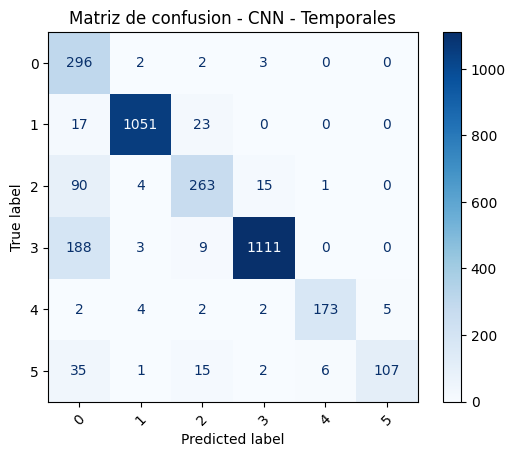

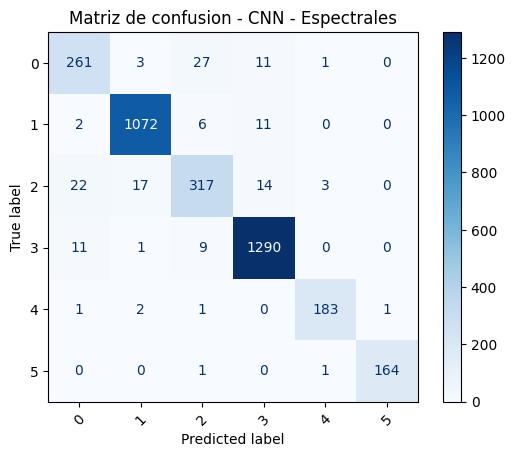

In [51]:
confusion_matrix_models(y_temp_test, y_temp_pred, "Matriz de confusion - CNN - Temporales")
confusion_matrix_models(y_spec_test, y_spec_pred, "Matriz de confusion - CNN - Espectrales")

In [75]:
ejemplos_clasificados(y_temp_test, y_temp_pred, "temporales", "CNN")
ejemplos_clasificados(y_spec_test, y_spec_pred, "espectrales", "CNN")

Ejemplos clasificados de CNN - temporales

Clasificados correctamente:


,Index,True,Pred
0,13170,1,1
1,2751,2,2
2,744,3,3
3,12907,3,3
4,15729,3,3



Clasificados incorrectamente:


,Index,True,Pred
0,9180,4,5
1,4351,0,2
2,7346,1,2
3,3821,0,3
4,2270,2,3


Ejemplos clasificados de CNN - espectrales

Clasificados correctamente:


,Index,True,Pred
0,13170,1,1
1,744,3,3
2,12907,3,3
3,15729,3,3
4,8620,3,3



Clasificados incorrectamente:


,Index,True,Pred
0,2751,2,3
1,9180,4,0
2,4351,0,3
3,7346,1,0
4,12495,2,1
